<a href="https://colab.research.google.com/github/rittikarijhwani/movie-recommendation-system/blob/main/movie_rec_cosine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
movies = pd.read_csv('movies.csv')

In [ ]:
movies.head(5)

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   genre              9997 non-null   object 
 3   original_language  10000 non-null  object 
 4   overview           9987 non-null   object 
 5   popularity         10000 non-null  float64
 6   release_date       10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.2+ KB


<ipython-input-4-d4075c5cf29c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="release_year_bin", data=movies, palette="muted")


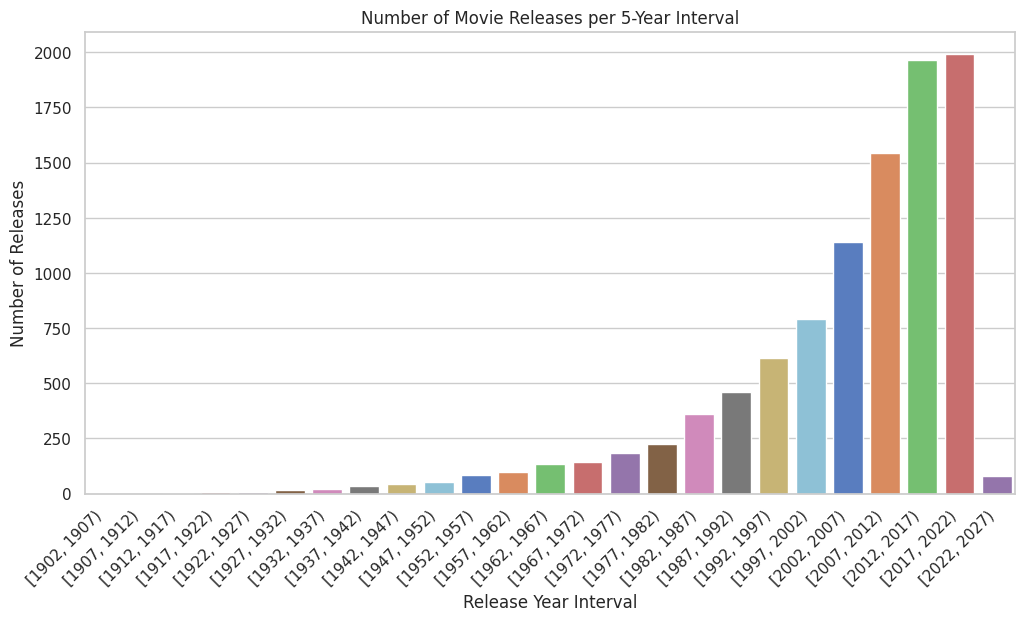

In [ ]:
sns.set(style="whitegrid")

# Extract release year
movies['release_year'] = pd.to_datetime(movies['release_date']).dt.year

# Bin the years into 5-year intervals
movies['release_year_bin'] = pd.cut(movies['release_year'], bins=range(movies['release_year'].min(), movies['release_year'].max()+6, 5), right=False)

# Visualization: Number of Releases per 5-Year Interval
plt.figure(figsize=(12, 6))
sns.countplot(x="release_year_bin", data=movies, palette="muted")
plt.title('Number of Movie Releases per 5-Year Interval')
plt.xlabel('Release Year Interval')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

<ipython-input-5-d3c8030d992d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='original_language', data=movies, order=movies['original_language'].value_counts().index, palette='magma')


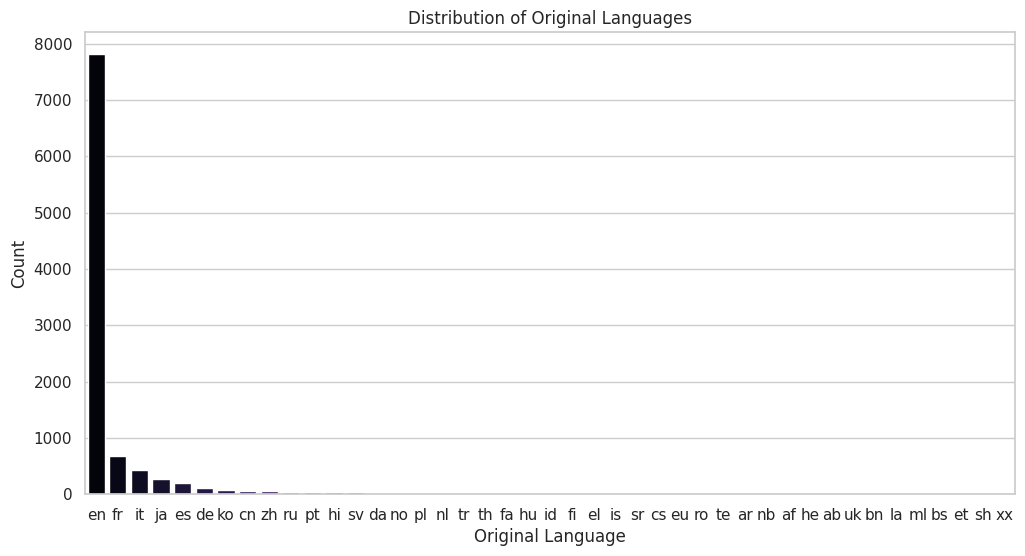

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='original_language', data=movies, order=movies['original_language'].value_counts().index, palette='magma')
plt.title('Distribution of Original Languages')
plt.xlabel('Original Language')
plt.ylabel('Count')
plt.show()

In [ ]:
#checking null values
movies.isnull().sum()

id                    0
title                 0
genre                 3
original_language     0
overview             13
popularity            0
release_date          0
vote_average          0
vote_count            0
release_year          0
release_year_bin      0
dtype: int64

In [ ]:
# keeping id, title, genre, overview (feature selection/engineering)
movies = movies[['id', 'title', 'genre', 'overview']]
movies

,id,title,genre,overview
0,278,The Shawshank Redemption,"Drama,Crime",Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance","Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Drama,Crime","Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,"Drama,History,War",The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,"Drama,Crime",In the continuing saga of the Corleone crime f...
...,...,...,...,...
9995,10196,The Last Airbender,"Action,Adventure,Fantasy","The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,"Action,TV Movie,Science Fiction,Comedy,Adventure",The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"Action,Science Fiction,War","During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,"Adventure,Fantasy,Action,Drama",A man named Farmer sets out to rescue his kidn...


In [ ]:
 #merging overview and genre as tags
 movies['tags'] = movies['overview'] + movies['genre']
 movies = movies[['id', 'title', 'tags']]
 movies.head(5)

,id,title,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...


In [ ]:
#turning text to vector in order to be able to use cosine similarity algorithm
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, stop_words = 'english') #turns text into numeric format (matrix of token counts)
vector = cv.fit_transform(movies['tags'].values.astype('U')).toarray() #array of word count for each movie tag, order is 10000 x 10000
vector.shape

(10000, 10000)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.05634362, 0.12888482, ..., 0.07559289, 0.11065667,
        0.06388766],
       [0.05634362, 1.        , 0.07624929, ..., 0.        , 0.03636965,
        0.        ],
       [0.12888482, 0.07624929, 1.        , ..., 0.02273314, 0.06655583,
        0.08645856],
       ...,
       [0.07559289, 0.        , 0.02273314, ..., 1.        , 0.03253   ,
        0.02817181],
       [0.11065667, 0.03636965, 0.06655583, ..., 0.03253   , 1.        ,
        0.0412393 ],
       [0.06388766, 0.        , 0.08645856, ..., 0.02817181, 0.0412393 ,
        1.        ]])

In [ ]:
#using index no to refer to movie titles, extracting index no(starts from 0) [INDEX NO != ID]
movies[movies['title']=="My Name Is Khan"].index[0]

248

In [ ]:
movies[movies['title']=="My Name Is Khan"]

,id,title,tags
248,26022,My Name Is Khan,"Rizwan Khan, a Muslim from the Borivali sectio..."


In [ ]:
#calculating distance between our vector and other vectors, least distance = similar movie
similarity[248]

array([0.03779645, 0.0745356 , 0.03409972, ..., 0.        , 0.09759001,
       0.        ])

In [ ]:
distance = sorted(list(enumerate(similarity[248])), reverse = True, key = lambda vector:vector[1])
for i in distance[1:6]: #showing 5 most similar movies
    print(movies.iloc[i[0]].title)

Cleveland Abduction
Riding in Cars with Boys
Mother's Day
The Diary of a Teenage Girl
I Could Never Be Your Woman


In [ ]:
def recommend(movie):
    index = movies[movies['title']==movie].index[0]
    distance = sorted(list(enumerate(similarity[index])), reverse = True, key = lambda vector:vector[1])
    for i in distance[1:6]:
        print(movies.iloc[i[0]].title)

In [ ]:
recommend("Avengers: Endgame")

Captain Marvel
Replicant
Captain America: Civil War
Fantastic Voyage
Avengers: Infinity War


In [ ]:
recommend("Harry Potter and the Deathly Hallows: Part 2")

Harry Potter and the Deathly Hallows: Part 1
Harry Potter and the Chamber of Secrets
Harry Potter and the Order of the Phoenix
Harry Potter and the Goblet of Fire
Harry Potter and the Half-Blood Prince


In [ ]:
recommend("Dilwale Dulhania Le Jayenge")

A Passage to India
The Manual of Love
The Cameraman
The Graduate
A California Christmas


In [ ]:
 import pickle
 pickle.dump(movies, open('mov_list.pkl', 'wb' ))
pickle.dump(movies, open('similarity.pkl', 'wb' ))

In [ ]:
pickle.load(open('mov_list.pkl', 'rb'))

,id,title,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...
...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...
